In [861]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [862]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.8.0+cu129'

## 1. Data (preparing and loading)

Data can be almost anything which can be convert into numbers. 

Machine learning is a game of two parts:

- Turn your data, whatever it is, into numbers (a representation).
- Pick or build a model to learn the representation as best as possible.

To showcase this, let's create some *known* data using the linear regression forumla.

we'll use a linear regression formula to make a straight line with *known* **parameters**.

In [863]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# create 
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
# print(X)
y = weight * X + bias # linear regression formula. # something that i wanna achieve 

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [864]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general) 

**Creating training and test set with out data.**

In [865]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

**Visualize**

In [866]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.Figure(figsize=(10, 7))

    # Plot training data in blue 
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predicttions?
    if predictions is not None: 
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14});
    

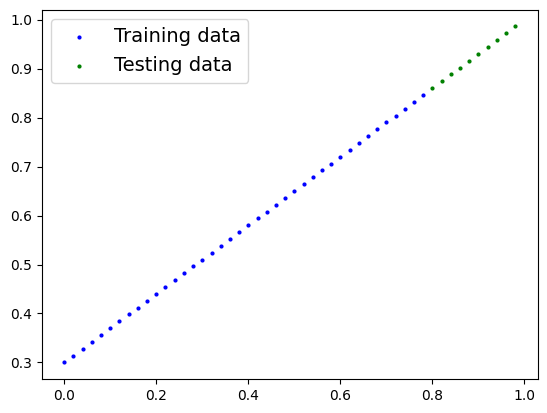

In [867]:
plot_predictions();

### Build a Model

First pytorch Model!

[`nn.module`](https://docs.pytorch.org/docs/stable/nn.html) fundamental module within the PyTorch deep learning framework, designed to facilitate the creation and training of neural networks. Provides all Building Blocks.

[Build Model](https://docs.pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)


[`nn.Module`](https://docs.pytorch.org/docs/stable/generated/torch.nn.Module.html) : Base class for all neural network in PyTorch. 

[`nn.Parameter`](https://docs.pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html)

`requires_grad` :  automatic differentiation engine (Autograd) should record operations performed on that tensor for gradient computation.


What this model does:
* Start with random values ( weight & bias)
* look at training data and adjust the random values to better represent ( or get closer to ) the ideal values ( the weight and bias values we used to create the data )

Created two parameters instantiated as random
we working with simple dataset 

if dataset which is not created by you, wont create this parameters right they will be from `nn` module.

How does it do so? 
1. Gradient descent
2. Backpropagation

`nn.Linear(1,1)` - in-built Linear Regression model

Custom Model - Custom Model (LinearRegressionModel): You manually define and initialize the weights and bias as `nn.Parameter` objects.

Built-in Layer - This is an encapsulated module that handles the weight and bias initialization for y u. It's a more abstract and standardized way to add a linear layer, nn.Linear is the preferred approach for real-world projects because it abstracts away the manual parameter creation and management, which can get complicated in larger models.

https://colab.research.google.com/drive/1QOIGNiJ0uwGJpiJQu1B0UyTK9kZ_zplc#scrollTo=CjBtrSDM2BHV

In [868]:
# Create a Linear Regression handcrafted model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 

        # initialize model parameters
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)
        
        # print(f"\nWeight:> {self.weights}\n\n" )
        
        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))
        
        # print(f"Bias:> {self.bias}\n\n" )

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [869]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [870]:
# Create a random Seed
torch.manual_seed(42)

# x1 = torch.rand(3, 4)
x1 = torch.rand(1) # Try doing manually you will get it.
print(f"x1: {x1}")


# Create an instance of the model (this is a subclass of nn.module)
model1 = LinearRegressionModel()
 
# Check out the parameters
print(f"Parameters of Our Model W & B: {list(model1.parameters())}\n")

print(f"Look: {model1.forward(x1)}")

x1: tensor([0.8823])
Parameters of Our Model W & B: [Parameter containing:
tensor([-0.6382], requires_grad=True), Parameter containing:
tensor([1.3554], requires_grad=True)]

Look: tensor([0.7924], grad_fn=<AddBackward0>)


In [871]:
# List named parameters
model1.state_dict()

OrderedDict([('weights', tensor([-0.6382])), ('bias', tensor([1.3554]))])

In [872]:
# Create a random seed 
torch.manual_seed(42)

# Create an instance of the model ( this is a subclass of nn.Module )
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [873]:
# List named parameters
model_0.state_dict() 

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts y_test based on x_test.

When we pass data through our model, it's going to run it through the `forward()` method.

In [874]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [875]:
with torch.inference_mode(): # disable grad_tracking 
    y_preds = model_0(X_test) 
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [876]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

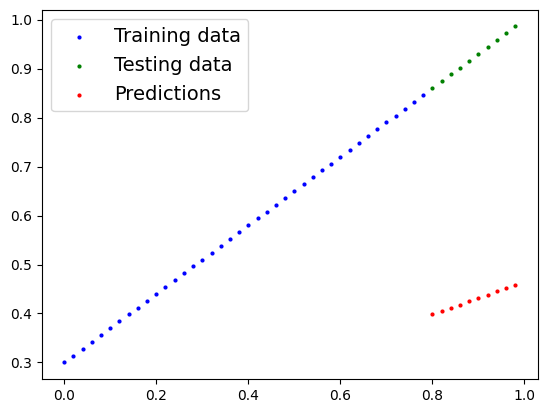

In [877]:
plot_predictions(predictions=y_preds)

#### 3. Train model
The whole idea of training is for a model to move from some unknown parameters (these may be random) to some known parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

- Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

- **Loss function**: A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
- **Optimizer**: Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & Bias) to improve the loss function.


And specifically for pytorch, we need
- A training loop
- A tesing loop

In [878]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [879]:
# check out models pararmters ( a parameter is a value that the model sets itself )
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

**Mean absolute error** (MAE, in PyTorch: torch.nn.L1Loss) measures the absolute difference between two points (predictions and labels) and then takes the mean across all examples.

And we'll use SGD, `torch.optim.SGD(params, lr)` where:

- params is the target model parameters you'd like to optimize (e.g. the weights and bias values we randomly set before).

- `lr` is the *learning rate* you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a *hyperparameter* (because it's set by a machine learning engineer). Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time (this is called learning rate scheduling).

    - small `lr` -> small changes
    - large `lr` -> large changes

In [880]:
# Setup a loss function 
loss_fn = nn.L1Loss()

# Setup a optimizer ( stochastic gradient descent )
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameters you can set
                            # the way the the rate is the way the parameters changes.

### Building a training loop (and a testing loop) in PyTorch
A couple of things we need in a training loop:

0. Loop through the data

1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data also called forward propagation

2. Calculate the loss (compare forward pass predictions to ground truth labels)

3. Optimizer zero grad

4. Loss backward move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss ( **backpropagation** )

5. Optimizer step improve the loss use the optimizer to adjust our model's parameters to try and improves the loss ( **gradient descent** )

In [881]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training
    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass :  on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)
    print(f"Loss: {loss}")

    # 3. Optimiser zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    # Performs backpropagation on the loss with respect to the parameters of the model ( calculate gradients of each parameter )
    loss.backward()

    # 5. Progress the optimizer
    # Takes steps to optimize ( perform gradient descent )
    optimizer.step() # by default how the gradient changes will accuumate through the loop so... we have to zero them above f 


    ### Testing
    # Put the model in evaluation mode
    model_0.eval() # turns off different settings in the model not needed for 

    with torch.inference_mode(): 
        
        # 1. Do the forward pass
        test_preds = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_preds, y_test)

    # Print out what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach())
        test_loss_values.append(test_loss.detach())
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
        print(model_0.state_dict())
        
# print(model_0.state_dict())

Loss: 0.31288138031959534
Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([

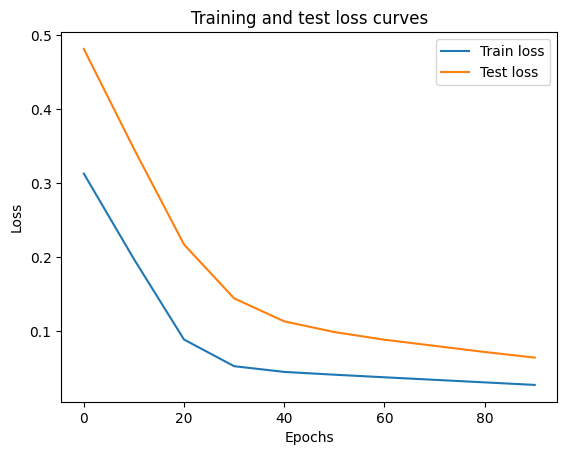

In [882]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

when testing we dont need Backpropagation and GradDescnet 
we just evaluating things.

Things we do while testing: 
- forward pass 
- calculate the testloss
- 

In [883]:
y_pred

tensor([[0.3518],
        [0.3633],
        [0.3749],
        [0.3864],
        [0.3979],
        [0.4095],
        [0.4210],
        [0.4325],
        [0.4441],
        [0.4556],
        [0.4671],
        [0.4787],
        [0.4902],
        [0.5017],
        [0.5133],
        [0.5248],
        [0.5363],
        [0.5479],
        [0.5594],
        [0.5709],
        [0.5825],
        [0.5940],
        [0.6055],
        [0.6171],
        [0.6286],
        [0.6401],
        [0.6517],
        [0.6632],
        [0.6747],
        [0.6863],
        [0.6978],
        [0.7093],
        [0.7209],
        [0.7324],
        [0.7439],
        [0.7555],
        [0.7670],
        [0.7785],
        [0.7901],
        [0.8016]], grad_fn=<AddBackward0>)

In [884]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [885]:
weight, bias

(0.7, 0.3)

In [886]:
y_pred

tensor([[0.3518],
        [0.3633],
        [0.3749],
        [0.3864],
        [0.3979],
        [0.4095],
        [0.4210],
        [0.4325],
        [0.4441],
        [0.4556],
        [0.4671],
        [0.4787],
        [0.4902],
        [0.5017],
        [0.5133],
        [0.5248],
        [0.5363],
        [0.5479],
        [0.5594],
        [0.5709],
        [0.5825],
        [0.5940],
        [0.6055],
        [0.6171],
        [0.6286],
        [0.6401],
        [0.6517],
        [0.6632],
        [0.6747],
        [0.6863],
        [0.6978],
        [0.7093],
        [0.7209],
        [0.7324],
        [0.7439],
        [0.7555],
        [0.7670],
        [0.7785],
        [0.7901],
        [0.8016]], grad_fn=<AddBackward0>)

In [887]:
with torch.inference_mode(): # disable grad_tracking 
    y_preds_new = model_0(X_test) 
# y_preds_new

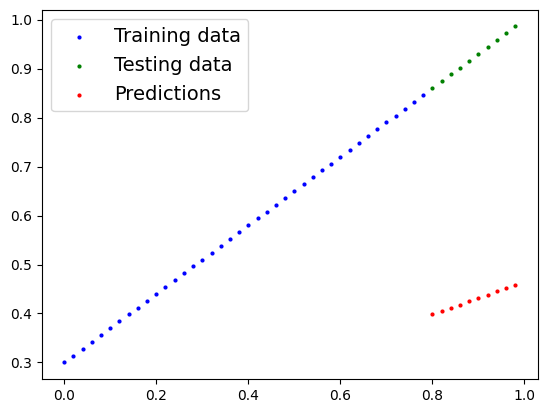

In [888]:
plot_predictions(predictions=y_preds) # start 

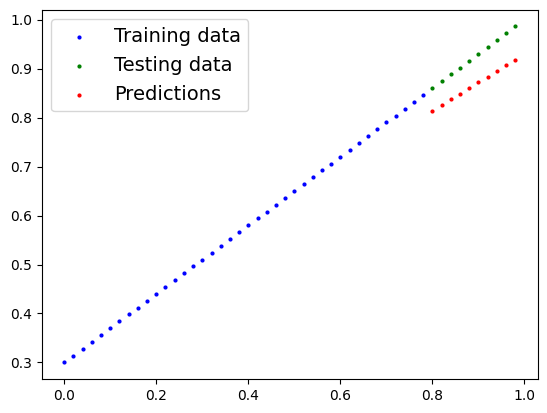

In [889]:
plot_predictions(predictions=y_preds_new) # end

### `nn.Linear`

nn.Linear applies a linear transformation to the incoming data: `y=xA^T + b`. It's designed to connect one layer of a neural network to the next.

Explicit vs. Abstract Parameter Management: When you handcraft a linear model, you explicitly define and manage the weights and bias as nn.Parameter objects. In contrast, nn.Linear is a pre-built module that abstracts this process, automatically creating and initializing the parameters based on the in_features and out_features you provide.

In [890]:
# torch.manual_seed(43)

# model = nn.Linear(in_features=1, out_features=1)
model = nn.Linear(in_features=2, out_features=1)

print(f"Weight:> {model.weight}\n\n" )

print(f"Bias:> {model.bias}\n\n" )


# dummy_data = torch.tensor([[2.0]])
dummy_data = torch.tensor([[2.0, 1.0]])
# dummy_data.ndim
print(dummy_data.dim())

# Pass the data through the model
output = model(dummy_data)

print(f"Dummy data: {dummy_data}\n")
print(f"Model output: {output}\n")
print(f"Manual calculation: {dummy_data * model.weight + model.bias}")

# The output from the model is the same as the manual calculation.

Weight:> Parameter containing:
tensor([[0.5406, 0.5869]], requires_grad=True)


Bias:> Parameter containing:
tensor([-0.1657], requires_grad=True)


2
Dummy data: tensor([[2., 1.]])

Model output: tensor([[1.5025]], grad_fn=<AddmmBackward0>)

Manual calculation: tensor([[0.9156, 0.4212]], grad_fn=<AddBackward0>)


### PyTorch model buidling essentials

PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

`torch.nn`, `torch.optim`, `torch.utils.data.Dataset` and `torch.utils.data.DataLoader`

| PyTorch module                                                                                                | What does it do?                                                                                                                                                                                                                                                                                 |
| ------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html)                                                         | Contains all of the building blocks for computational graphs ( a neural network is considered as C-graphs) (essentially a series of computations executed in a particular way).                                                                                                                                                                |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [**gradient descent**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)) are calculated automatically, this is often referred to as "autograd". |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module)           | The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented.                                                |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html)                                                   | *This is where optimizers of pytorch lives* Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss).                                                                                                                  |
| `def forward()`                                                                                               | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above).                                                                                          |